In [ ]:
using Plots
using Random
using LinearAlgebra

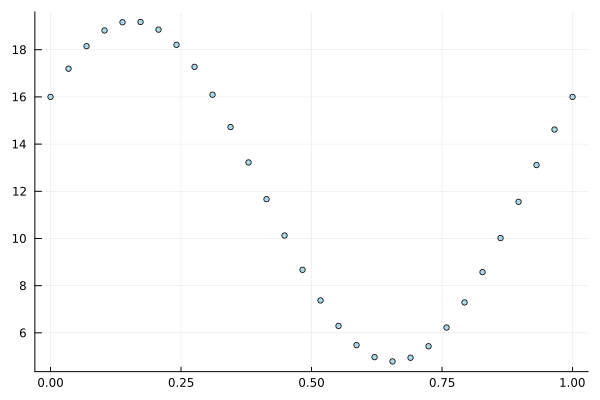

In [ ]:
Random.seed!(0)
# Gerando dados fictícios para teste
n = 30
x = range(0, 1, length=n)

ϕ1(x) = sin(2π * x)
ϕ2(x) = cos(2π * x)
ϕ3(x) = 1.0

y = 6 * ϕ1.(x) + 4 * ϕ2.(x) + 12*ϕ3.(x)  #ruído
scatter(x, y, c=:lightblue, ms=3, leg=false)


In [ ]:
x

0.0:0.034482758620689655:1.0

In [ ]:
x[29]

0.9655172413793104

In [ ]:
size(x)

(30,)

In [ ]:
size(y)

(30,)

In [ ]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [ ]:
π

π = 3.1415926535897...

In [ ]:
function matrix_sen_cos(x,y)
    n,=size(y)
    V=zeros(n,3)
    for i=1:n #linhas
        V[i,1]=sin(2*π*x[i])
        V[i,2]=cos(2*π*x[i])
        V[i,3]=1
    end
    return V
end

matrix_sen_cos (generic function with 1 method)

In [ ]:
matrix_sen_cos(x,y)

30×3 Matrix{Float64}:
  0.0           1.0        1.0
  0.21497       0.976621   1.0
  0.419889      0.907575   1.0
  0.605174      0.796093   1.0
  0.762162      0.647386   1.0
  0.883512      0.468408   1.0
  0.96355       0.267528   1.0
  0.998533      0.0541389  1.0
  0.986827     -0.161782   1.0
  0.928977     -0.370138   1.0
  0.827689     -0.561187   1.0
  0.687699     -0.725995   1.0
  0.515554     -0.856857   1.0
  ⋮                        
 -0.687699     -0.725995   1.0
 -0.827689     -0.561187   1.0
 -0.928977     -0.370138   1.0
 -0.986827     -0.161782   1.0
 -0.998533      0.0541389  1.0
 -0.96355       0.267528   1.0
 -0.883512      0.468408   1.0
 -0.762162      0.647386   1.0
 -0.605174      0.796093   1.0
 -0.419889      0.907575   1.0
 -0.21497       0.976621   1.0
 -2.44929e-16   1.0        1.0

In [ ]:
V=vandermonde(x,y,3)
size(V)

(30, 4)

In [ ]:
V

30×4 Matrix{Float64}:
 1.0  0.0        0.0         0.0
 1.0  0.0344828  0.00118906  4.10021e-5
 1.0  0.0689655  0.00475624  0.000328017
 1.0  0.103448   0.0107015   0.00110706
 1.0  0.137931   0.019025    0.00262413
 1.0  0.172414   0.0297265   0.00512526
 1.0  0.206897   0.0428062   0.00885645
 1.0  0.241379   0.058264    0.0140637
 1.0  0.275862   0.0760999   0.0209931
 1.0  0.310345   0.0963139   0.0298905
 1.0  0.344828   0.118906    0.0410021
 1.0  0.37931    0.143876    0.0545738
 1.0  0.413793   0.171225    0.0708516
 ⋮                           
 1.0  0.62069    0.385256    0.239124
 1.0  0.655172   0.429251    0.281233
 1.0  0.689655   0.475624    0.328017
 1.0  0.724138   0.524376    0.37972
 1.0  0.758621   0.575505    0.43659
 1.0  0.793103   0.629013    0.498872
 1.0  0.827586   0.684899    0.566813
 1.0  0.862069   0.743163    0.640658
 1.0  0.896552   0.803805    0.720653
 1.0  0.931034   0.866825    0.807044
 1.0  0.965517   0.932224    0.900078
 1.0  1.0        1.0    

In [ ]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

regressão (generic function with 1 method)

In [ ]:
c=regressão(x,y,2)

3-element Vector{Float64}:
  236.19999999999962
 -169.0939393939393
   23.439393939393934

In [ ]:
parabola(x)=c[1]+c[2]*x+c[3]*x^2

parabola (generic function with 1 method)

In [ ]:
cúbica(x)=d[1]+d[2]*x+d[3]*x^2+d[4]*x^3

cúbica (generic function with 1 method)

In [ ]:
d=regressão(x,y,2)

3-element Vector{Float64}:
  236.19999999999962
 -169.0939393939393
   23.439393939393934

In [ ]:
#constante
V=vandermonde(x,y,0)
a=regressão(x,y,0)
constante(x)=a[1]

#reta
V=vandermonde(x,y,1)
b=regressão(x,y,1)
reta(x)=b[1]+b[2]*x

#parabola
V=vandermonde(x,y,2)
c=regressão(x,y,2)
parabola(x)=c[1]+c[2]*x+c[3]*x^2

#cúbica
V=vandermonde(x,y,3)
d=regressão(x,y,3)
cúbica(x)=d[1]+d[2]*x+d[3]*x^2+d[4]*x^3

#modelo_sc]
V=matrix_sen_cos(x,y)
f=V\y
modelo_sc(x)=f[1]*sin(2*π*x)+f[2]*cos(2*π*x)+f[3]

modelo_sc (generic function with 1 method)

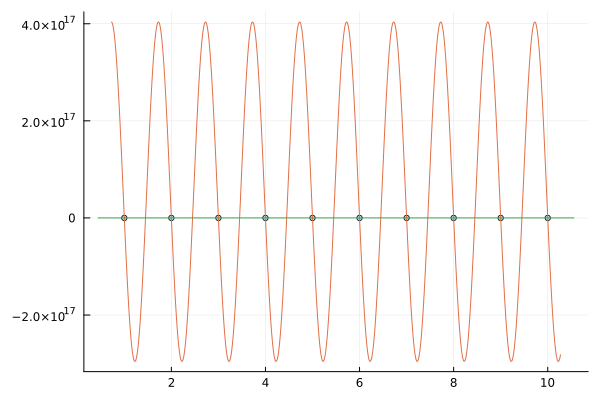

In [ ]:
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(modelo_sc)
plot!(cúbica)

In [ ]:
f[1]

6.078183207949029

In [ ]:
f[2]

4.319356777972372

In [ ]:
f[3]

12.027560388497054

In [ ]:
parabola(4.3)

507.2139279793196

In [ ]:
function erro_total(x,y,modelo)
    n,=size(y)
    S=0
    for i=1:n
        S=S+(y[i]-modelo(x[i]))^2
    end
    return sqrt(S)
end

erro_total (generic function with 1 method)

In [ ]:
erro_total(x,y,parabola)

256.46317001814805

In [ ]:
F = [x -> 1.0, x -> x, x -> x^2]

3-element Vector{Function}:
 #13 (generic function with 1 method)
 #14 (generic function with 1 method)
 #15 (generic function with 1 method)

In [ ]:
#Erro da parábola 17.04057868524984


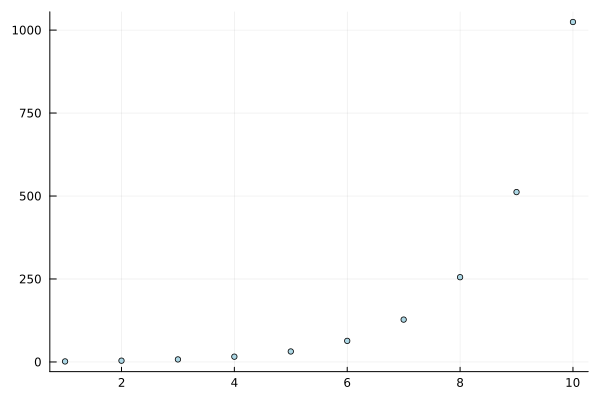

In [ ]:
#y=2^x
x=[1;2;3;4;5;6;7;8;9;10]
y=[2;4;8;16;32;64;128;256;512;1024]

ruido=randn(10)*0.3

y=y+ruido
#Desenho no mundo original
scatter(x, y, c=:lightblue, ms=3, leg=false)

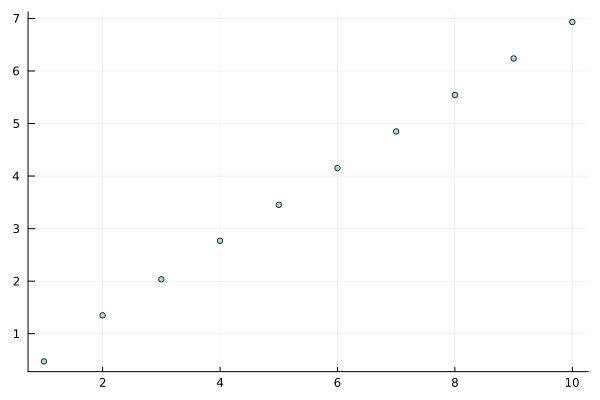

In [ ]:
#Mundo barra
x_barra=x
y_barra=log.(y)
scatter(x_barra, y_barra, c=:lightblue, ms=3, leg=false)

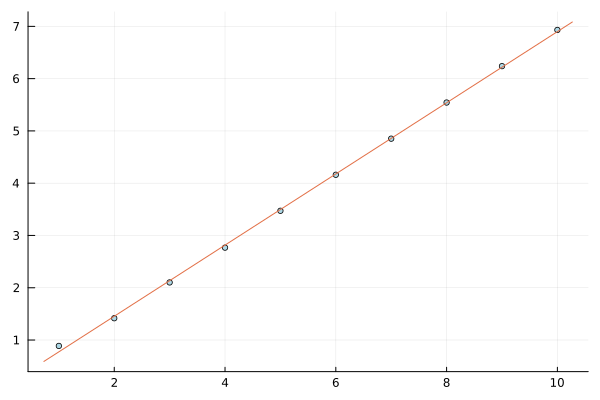

In [ ]:
V=vandermonde(x_barra,y_barra,1)
c_barra=regressão(x_barra,y_barra,1)
reta_barra(x)=c_barra[1]+c_barra[2]*x
scatter(x_barra, y_barra, c=:lightblue, ms=3, leg=false)
plot!(reta_barra)

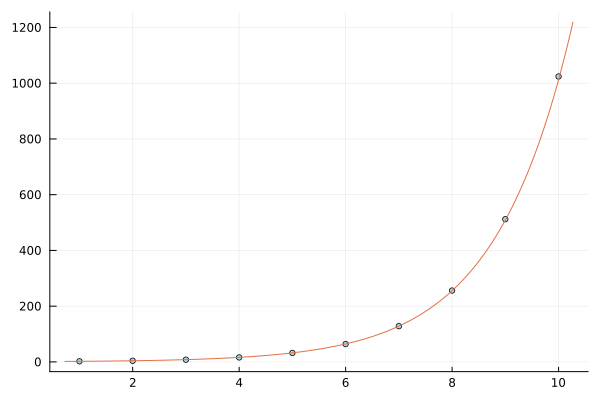

In [ ]:
#y=2^x
x=[1;2;3;4;5;6;7;8;9;10]
y=[2;4;8;16;32;64;128;256;512;1024]
ruido=rand(10)*0.2
y=y+ruido

# Dicionário (troca de variável) indo pro mundo barra
x_barra=x
y_barra=log.(y)

#Regressão com grau = 1(reta) no Mundo barra
V=vandermonde(x_barra,y_barra,1)
c_barra=regressão(x_barra,y_barra,1)


#Dicionário (troca de variável) voltando pro mundo original
c1=exp(c_barra[1])
c2=c_barra[2]
exponencial(x)=c1*exp(c2*x) #modelo exponecial

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(exponencial)

In [ ]:
3*rand(10)

10-element Vector{Float64}:
 2.6207427337898492
 1.9647647334690186
 1.7601373189193061
 1.8980865524548587
 2.2050114132174397
 1.645026343870026
 1.4306479346270993
 1.807123806333496
 2.374038747124424
 0.14736581703950624

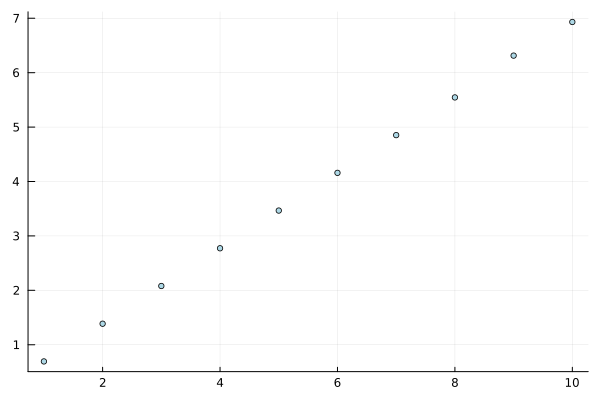

In [ ]:
#y=2^x
x=[1;2;3;4;5;6;7;8;9;10]
y=[2;4;8;16;32;64;128;256;512+40;1024]
#ruido=randn(10)*10
#y=y+ruido

# Dicionário (troca de variável) indo pro mundo barra
x_barra=x
y_barra=log.(y)

scatter(x_barra, y_barra, c=:lightblue, ms=3, leg=false)

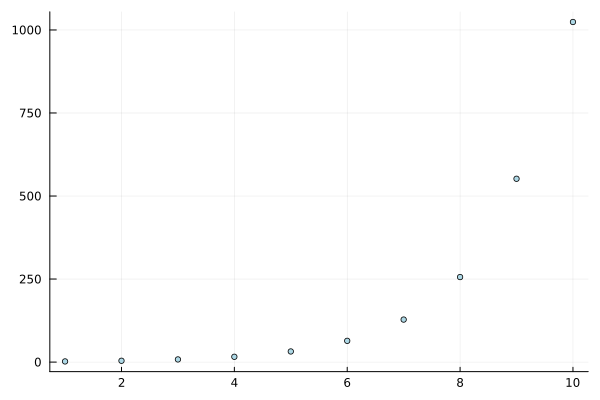

In [ ]:
scatter(x, y, c=:lightblue, ms=3, leg=false)